In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
df1 = pd.read_csv('patients.csv')
df2 = pd.read_csv('immunizations.csv', parse_dates=['DATE'])
df_al = df1.merge(df2, left_on = 'Id', right_on = 'PATIENT')
df_al.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,42.228354,-72.562951,271227.08,1334.88,2011-07-28 15:02:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,140,Influenza seasonal injectable preservative ...,140.52
1,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,42.228354,-72.562951,271227.08,1334.88,2011-07-28 15:02:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,113,Td (adult) preservative free,140.52
2,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,42.228354,-72.562951,271227.08,1334.88,2011-07-28 15:02:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,43,Hep B adult,140.52
3,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,42.228354,-72.562951,271227.08,1334.88,2011-07-28 15:02:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,114,meningococcal MCV4P,140.52
4,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,42.228354,-72.562951,271227.08,1334.88,2014-07-31 15:02:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,95e23731-0629-4262-bb5b-3e1f078ac864,140,Influenza seasonal injectable preservative ...,140.52


In [3]:
dt_stop = df_al['DATE'].dropna()
dt_stop = dt_stop.unique()
dt_stop

<DatetimeArray>
['2011-07-28 15:02:18+00:00', '2014-07-31 15:02:18+00:00',
 '2017-08-03 15:02:18+00:00', '2012-01-23 17:45:28+00:00',
 '2015-01-26 17:45:28+00:00', '2017-01-09 17:45:28+00:00',
 '2018-01-29 17:45:28+00:00', '2010-07-27 12:58:08+00:00',
 '2011-05-24 12:58:08+00:00', '2014-08-05 12:58:08+00:00',
 ...
 '1982-12-18 17:27:52+00:00', '1983-12-24 17:27:52+00:00',
 '1984-12-29 17:27:52+00:00', '1986-01-04 17:27:52+00:00',
 '2010-05-22 17:27:52+00:00', '2011-05-28 17:27:52+00:00',
 '2012-06-02 17:27:52+00:00', '2013-06-08 17:27:52+00:00',
 '2014-06-14 17:27:52+00:00', '2015-06-20 17:27:52+00:00']
Length: 10162, dtype: datetime64[ns, UTC]

In [4]:
df_al['DATE'] = df_al['DATE'].replace(dt_stop, np.full(len(dt_stop), 1))
df_al['DATE'] = df_al['DATE'].replace({pd.NaT: "0"})
df_al['DATE']

0        1
1        1
2        1
3        1
4        1
        ..
15473    1
15474    1
15475    1
15476    1
15477    1
Name: DATE, Length: 15478, dtype: int64

In [5]:
contigency = pd.crosstab(df_al['DATE'], df_al['DESCRIPTION'])
contigency

DESCRIPTION,DTaP,HPV quadrivalent,Hep A adult,Hep A ped/adol 2 dose,Hep B adolescent or pediatric,Hep B adult,Hib (PRP-OMP),IPV,Influenza seasonal injectable preservative free,MMR,Pneumococcal conjugate PCV 13,Td (adult) preservative free,Tdap,meningococcal MCV4P,pneumococcal polysaccharide vaccine 23 valent,rotavirus monovalent,varicella,zoster
DATE,,,,,,,,,,,,,,,,,,
1,572,424,281,230,352,263,354,481,9385,233,661,830,142,432,105,225,228,280


<AxesSubplot:xlabel='DESCRIPTION', ylabel='DATE'>

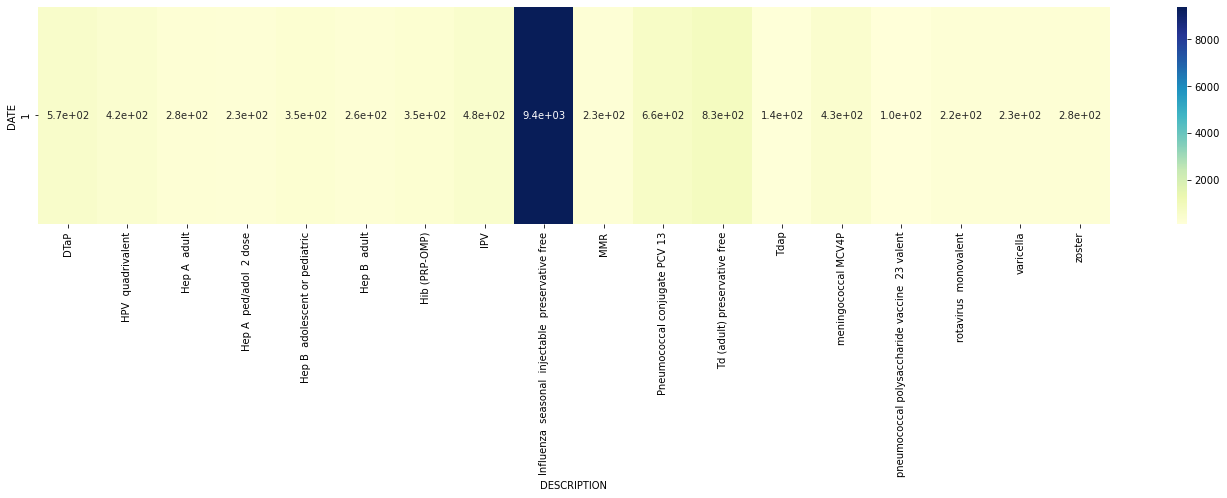

In [6]:
plt.figure(figsize=(24,4))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [7]:
c, p, dof, expected = chi2_contingency(contigency)
p

1.0

In [8]:
features_column = ['RACE', 'ETHNICITY', 'GENDER', 'DESCRIPTION']
label_column = ['DATE']

In [9]:
dataset = df_al[features_column + label_column]
dataset['DATE'] = dataset['DATE'].astype('int32')

#reference for numerical categories
categorical_dict = {}

#convert categorical data into numerical data
for feature_name in features_column:
    dataset[feature_name] = dataset[feature_name].astype('category')
    categorical_dict.update({feature_name: dataset[feature_name].cat.categories})
    dataset[feature_name] = dataset[feature_name].astype('category').cat.codes
    
print(categorical_dict)

{'RACE': Index(['asian', 'black', 'native', 'other', 'white'], dtype='object'), 'ETHNICITY': Index(['hispanic', 'nonhispanic'], dtype='object'), 'GENDER': Index(['F', 'M'], dtype='object'), 'DESCRIPTION': Index(['DTaP', 'HPV  quadrivalent', 'Hep A  adult', 'Hep A  ped/adol  2 dose',
       'Hep B  adolescent or pediatric', 'Hep B  adult', 'Hib (PRP-OMP)',
       'IPV', 'Influenza  seasonal  injectable  preservative free', 'MMR',
       'Pneumococcal conjugate PCV 13', 'Td (adult) preservative free', 'Tdap',
       'meningococcal MCV4P', 'pneumococcal polysaccharide vaccine  23 valent',
       'rotavirus  monovalent', 'varicella', 'zoster'],
      dtype='object')}


<ipython-input-9-ad9e2bfc53a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['DATE'] = dataset['DATE'].astype('int32')
<ipython-input-9-ad9e2bfc53a5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature_name] = dataset[feature_name].astype('category')
<ipython-input-9-ad9e2bfc53a5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [10]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [11]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('DATE')
test_labels = test_features.pop('DATE')

In [12]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(len(features_column)),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(1)
  ])

  model.compile(loss = 'mean_absolute_error', metrics = ['accuracy'],
                optimizer = 'adam')
  return model

In [13]:
model = build_and_compile_model()

In [14]:
#fit the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            mode='min')
history = model.fit(
    train_features[features_column],
    train_labels,
    validation_split=0.2,
    callbacks=early_stopping,
    verbose=1, epochs=100)

Epoch 1/100
310/310 [==============================] - 1s 920us/step - loss: 0.1431 - accuracy: 0.9448 - val_loss: 0.0381 - val_accuracy: 1.0000
Epoch 2/100
310/310 [==============================] - 0s 567us/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 3/100
310/310 [==============================] - 0s 557us/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 4/100
310/310 [==============================] - 0s 564us/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 5/100
310/310 [==============================] - 0s 554us/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 6/100
310/310 [==============================] - 0s 590us/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 7/100
310/310 [==============================] - 0s 525us/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.0086 - val_ac

In [15]:
model.evaluate(test_features[features_column], test_labels)

97/97 [==============================] - 0s 386us/step - loss: 0.0065 - accuracy: 1.0000


[0.0064628045074641705, 1.0]

In [16]:
model.save('model_immunizations')

INFO:tensorflow:Assets written to: model_immunizations\assets
